In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.linspace(0,50,501)

In [3]:
#x

In [4]:
y = np.sin(x)

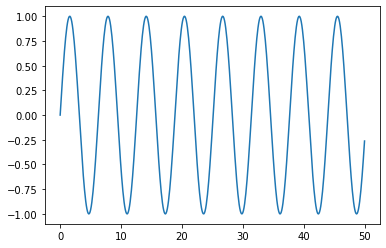

In [5]:
plt.plot(x,y)

In [6]:
df  = pd.DataFrame(data=y,index=x,columns=['sine'])

In [7]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:
test_parcent = 0.1

In [10]:
#cut off point for the dataframe
len(df)*test_parcent

50.1

In [11]:
test_point = np.round(len(df)*test_parcent)

In [12]:
test_point

50.0

In [13]:
test_indx = int(len(df)-test_point)

In [14]:
test_indx

451

In [15]:
train = df.iloc[:test_indx]

In [16]:
test = df.iloc[test_indx:]

In [17]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaler_train  = scaler.transform(train)

In [22]:
scaler_test = scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [25]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaler_train,scaler_train,length=length,batch_size=batch_size)

In [26]:
len(scaler_train)

451

In [27]:
len(generator)

426

In [28]:
X,y = generator[0]

In [29]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [30]:
y

array([[0.79923759]])

In [31]:
#scaler_train

<AxesSubplot:>

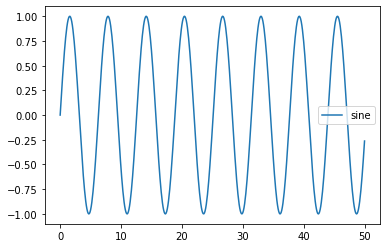

In [32]:
df.plot()

In [33]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaler_train,scaler_train,length=length,batch_size=batch_size)

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [36]:
n_features = 1

In [37]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
          

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 6ms/step - loss: 0.0256
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 1.4383e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 1.8068e-04
Epoch 4/5
401/401 [==============================] - 2s 6ms/step - loss: 2.5162e-04
Epoch 5/5
401/401 [==============================] - 2s 6ms/step - loss: 4.6389e-05


In [40]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

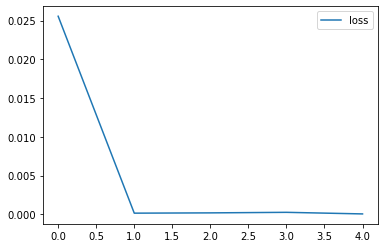

In [41]:
losses.plot()

In [42]:
first_eval_batch = scaler_train[-length:]

In [43]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [44]:
model.predict(first_eval_batch)

array([[0.94138545]], dtype=float32)

In [45]:
scaler_test[0]

array([0.94955134])

In [46]:
test_prediction = []

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [47]:
#first_eval_batch

In [48]:
#predicted_value =  [[[99]]]
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

In [49]:
test_prediction =[]

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
test_prediction

[array([0.94138545], dtype=float32),
 array([0.96149594], dtype=float32),
 array([0.9712817], dtype=float32),
 array([0.9800225], dtype=float32),
 array([0.98246354], dtype=float32),
 array([0.9807696], dtype=float32),
 array([0.9748092], dtype=float32),
 array([0.9638801], dtype=float32),
 array([0.95069575], dtype=float32),
 array([0.9319531], dtype=float32),
 array([0.9105185], dtype=float32),
 array([0.88509536], dtype=float32),
 array([0.855904], dtype=float32),
 array([0.8251184], dtype=float32),
 array([0.79009646], dtype=float32),
 array([0.75460565], dtype=float32),
 array([0.7152503], dtype=float32),
 array([0.6750096], dtype=float32),
 array([0.6340932], dtype=float32),
 array([0.5904105], dtype=float32),
 array([0.54883796], dtype=float32),
 array([0.5036999], dtype=float32),
 array([0.461549], dtype=float32),
 array([0.4178418], dtype=float32),
 array([0.37587538], dtype=float32),
 array([0.33593714], dtype=float32),
 array([0.29633963], dtype=float32),
 array([0.26092905]

In [51]:
scaler_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [52]:
true_prediction = scaler.inverse_transform(test_prediction)

In [54]:
test['Predictions'] = true_prediction

<ipython-input-54-661b3dfb2b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [55]:
test

,sine,Predictions
45.1,0.899097,0.882766
45.2,0.938307,0.922986
45.3,0.968142,0.942558
45.4,0.988304,0.960039
45.5,0.998591,0.964921
45.6,0.998900,0.961533
45.7,0.989229,0.949613
45.8,0.969673,0.927755
45.9,0.940429,0.901386
46.0,0.901788,0.863901


<AxesSubplot:>

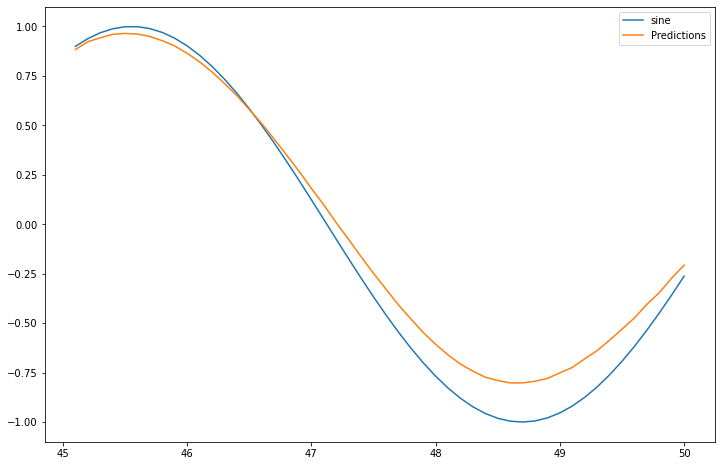

In [56]:
test.plot(figsize=(12,8))

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [60]:
length=49
generator = TimeseriesGenerator(scaler_train,scaler_train,length=length,batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaler_test,scaler_test,length=length,batch_size=batch_size)

In [61]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
          

In [62]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 14ms/step - loss: 0.0135 - val_loss: 1.3613e-05
Epoch 2/20
402/402 [==============================] - 5s 13ms/step - loss: 1.1057e-04 - val_loss: 7.0636e-05
Epoch 3/20
402/402 [==============================] - 5s 13ms/step - loss: 2.5881e-04 - val_loss: 9.7691e-05


In [63]:
test_prediction =[]

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<ipython-input-64-3afcfc3c64c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_prediction


<AxesSubplot:>

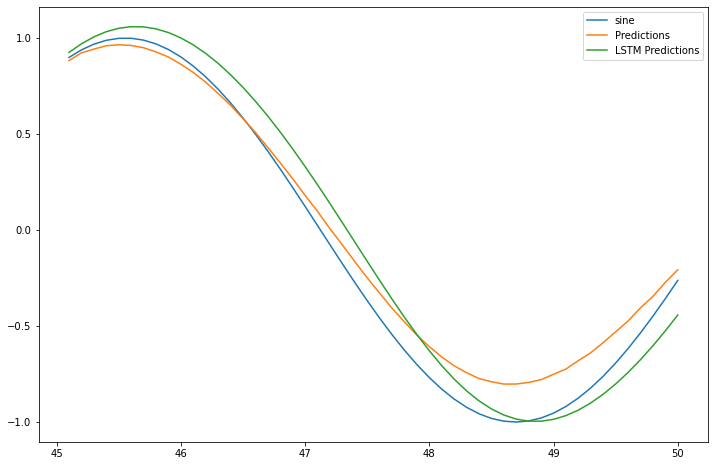

In [64]:
true_prediction = scaler.inverse_transform(test_prediction)
test['LSTM Predictions'] = true_prediction
test.plot(figsize=(12,8))

<AxesSubplot:>

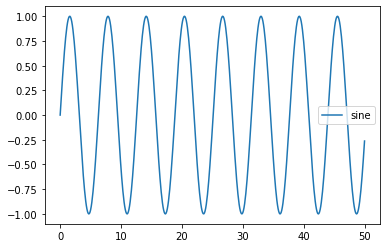

In [65]:
df.plot()

In [67]:
full_scaler = MinMaxScaler()
scale_full_data = full_scaler.fit_transform(df)

In [68]:
generator = TimeseriesGenerator(scale_full_data,scale_full_data,length=length,batch_size=batch_size)

In [69]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [70]:
model.fit(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 8s 14ms/step - loss: 0.0202
Epoch 2/6
452/452 [==============================] - 5s 12ms/step - loss: 1.9399e-04
Epoch 3/6
452/452 [==============================] - 6s 13ms/step - loss: 9.4712e-05
Epoch 4/6
452/452 [==============================] - 6s 13ms/step - loss: 2.6805e-04
Epoch 5/6
452/452 [==============================] - 7s 16ms/step - loss: 9.6562e-05
Epoch 6/6
452/452 [==============================] - 9s 19ms/step - loss: 4.2093e-04


In [71]:
forecast =[]

first_eval_batch = scale_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [72]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [73]:
forecast = scaler.inverse_transform(forecast)

In [74]:
forecast

array([[ 9.05319081e-01],
       [ 9.46780454e-01],
       [ 9.79098191e-01],
       [ 1.00202124e+00],
       [ 1.01543790e+00],
       [ 1.01936486e+00],
       [ 1.01393349e+00],
       [ 9.99377078e-01],
       [ 9.76012841e-01],
       [ 9.44225701e-01],
       [ 9.04452079e-01],
       [ 8.57166901e-01],
       [ 8.02873824e-01],
       [ 7.42097840e-01],
       [ 6.75383015e-01],
       [ 6.03290584e-01],
       [ 5.26401090e-01],
       [ 4.45316059e-01],
       [ 3.60661334e-01],
       [ 2.73090654e-01],
       [ 1.83286249e-01],
       [ 9.19609835e-02],
       [-1.44679284e-04],
       [-9.22641702e-02],
       [-1.83610357e-01]])

In [75]:
25*0.1

2.5

In [76]:
forecast_index  = np.arange(50.1,52.6,step=0.1)

In [77]:
len(forecast_index)

25

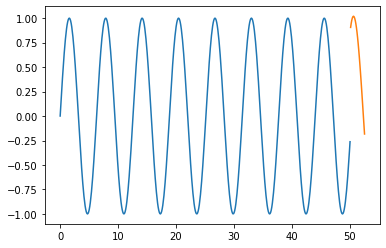

In [79]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)